In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
data= pd.read_excel("Health_Wait_times.xlsx")

In [3]:
data.head(5)

,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
0,Provincial,Alberta,NaN,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN
1,Provincial,Alberta,NaN,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN
2,Provincial,Alberta,NaN,Bladder Cancer Surgery,Volume,2008,Number of cases,NaN
3,Provincial,Alberta,NaN,Breast Cancer Surgery,50th Percentile,2008,Days,NaN
4,Provincial,Alberta,NaN,Breast Cancer Surgery,90th Percentile,2008,Days,NaN


In [4]:
data.tail(5)

,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
15759,Provincial,Saskatchewan,NaN,Prostate Cancer Surgery,Volume,2022,Number of cases,93.00
15760,Provincial,Saskatchewan,NaN,Radiation Therapy,% Meeting Benchmark,2022,Proportion,97.91
15761,Provincial,Saskatchewan,NaN,Radiation Therapy,50th Percentile,2022,Days,7.00
15762,Provincial,Saskatchewan,NaN,Radiation Therapy,90th Percentile,2022,Days,20.00
15763,Provincial,Saskatchewan,NaN,Radiation Therapy,Volume,2022,Number of cases,1293.00


## Exploratory data analytics

In [5]:
data.info()  # Check the data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15764 entries, 0 to 15763
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reporting level      15764 non-null  object 
 1   Province/territory   15764 non-null  object 
 2   Region               5112 non-null   object 
 3   Indicator            15764 non-null  object 
 4   Metric               15764 non-null  object 
 5   Data year            15764 non-null  object 
 6   Unit of measurement  15764 non-null  object 
 7   Indicator result     12378 non-null  float64
dtypes: float64(1), object(7)
memory usage: 985.4+ KB


In [6]:
data.head()  # Display the first few rows of the dataset


,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
0,Provincial,Alberta,NaN,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN
1,Provincial,Alberta,NaN,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN
2,Provincial,Alberta,NaN,Bladder Cancer Surgery,Volume,2008,Number of cases,NaN
3,Provincial,Alberta,NaN,Breast Cancer Surgery,50th Percentile,2008,Days,NaN
4,Provincial,Alberta,NaN,Breast Cancer Surgery,90th Percentile,2008,Days,NaN


In [7]:
data.isnull().sum()

Reporting level            0
Province/territory         0
Region                 10652
Indicator                  0
Metric                     0
Data year                  0
Unit of measurement        0
Indicator result        3386
dtype: int64

In [8]:
# Summary statistics for numerical columns
print(data.describe())

       Indicator result
count      1.237800e+04
mean       5.302652e+03
std        5.232202e+04
min        3.000000e+00
25%        5.214792e+01
50%        1.000000e+02
75%        3.250000e+02
max        1.818956e+06


In [9]:
data.drop(columns=['Region'], inplace=True)


In [10]:
data

,Reporting level,Province/territory,Indicator,Metric,Data year,Unit of measurement,Indicator result
0,Provincial,Alberta,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN
1,Provincial,Alberta,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN
2,Provincial,Alberta,Bladder Cancer Surgery,Volume,2008,Number of cases,NaN
3,Provincial,Alberta,Breast Cancer Surgery,50th Percentile,2008,Days,NaN
4,Provincial,Alberta,Breast Cancer Surgery,90th Percentile,2008,Days,NaN
...,...,...,...,...,...,...,...
15759,Provincial,Saskatchewan,Prostate Cancer Surgery,Volume,2022,Number of cases,93.00
15760,Provincial,Saskatchewan,Radiation Therapy,% Meeting Benchmark,2022,Proportion,97.91
15761,Provincial,Saskatchewan,Radiation Therapy,50th Percentile,2022,Days,7.00
15762,Provincial,Saskatchewan,Radiation Therapy,90th Percentile,2022,Days,20.00


In [11]:
# Drop rows with NaN values in the 'Indicator result' column
data.dropna(subset=['Indicator result'], inplace=True)

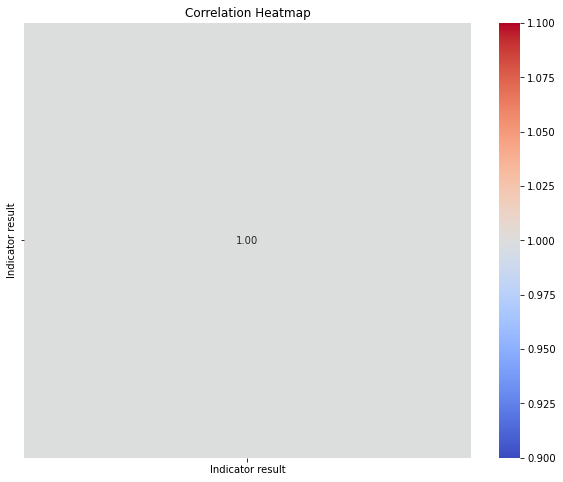

In [12]:
# Example: Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Iterate over each column and print its unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column} column:")
    print(unique_values)
    print()

Unique values in Reporting level column:
['Provincial' 'National' 'Regional']

Unique values in Province/territory column:
['Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Nova Scotia' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Saskatchewan' 'Canada']

Unique values in Indicator column:
['CABG' 'Cataract Surgery' 'CT Scan' 'Hip Replacement' 'Knee Replacement'
 'MRI Scan' 'Radiation Therapy' 'Hip Fracture Repair'
 'Hip Fracture Repair/Emergency and Inpatient' 'Bladder Cancer Surgery'
 'Breast Cancer Surgery' 'Colorectal Cancer Surgery' 'Lung Cancer Surgery'
 'Prostate Cancer Surgery']

Unique values in Metric column:
['% Meeting Benchmark' '50th Percentile' '90th Percentile' 'Volume'
 '50th percentile' '90th percentile' '% meeting benchmark']

Unique values in Data year column:
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 '2019FY' '2019Q3Q4' '2020FY' '2020Q3Q4' '2021FY' '2021Q3Q4' 2022]

Unique values in Unit of measureme

In [14]:
print(data['Data year'].unique())


[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 '2019FY' '2019Q3Q4' '2020FY' '2020Q3Q4' '2021FY' '2021Q3Q4' 2022]


In [15]:
# Convert 'Metric' column to lowercase
data['Metric'] = data['Metric'].str.lower()

# Verify the unique values in the 'Metric' column
print(data['Metric'].unique())

['% meeting benchmark' '50th percentile' '90th percentile' 'volume']


In [16]:
# Define a function to convert fiscal year values to calendar year
def convert_fiscal_year(year):
    if isinstance(year, str):
        if 'FY' in year:
            return int(year.split('FY')[0])
        elif 'Q3Q4' in year:
            return int(year.split('Q3Q4')[0])
    return year

# Apply the function to the 'Data year' column
data['Data year'] = data['Data year'].apply(convert_fiscal_year)

# Convert 'Data year' column to datetime format
data['Data year'] = pd.to_datetime(data['Data year'], format='%Y')

In [17]:
# Replace missing values with the mean of 'Indicator result'
mean_indicator_result = data['Indicator result'].mean()
data['Indicator result'].fillna(mean_indicator_result, inplace=True)

In [18]:
data.shape

(12378, 7)

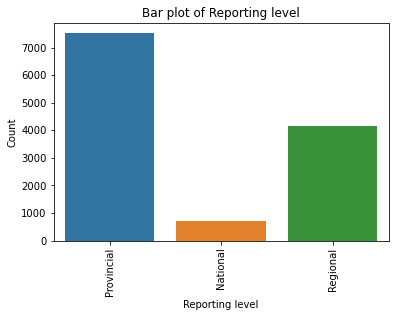

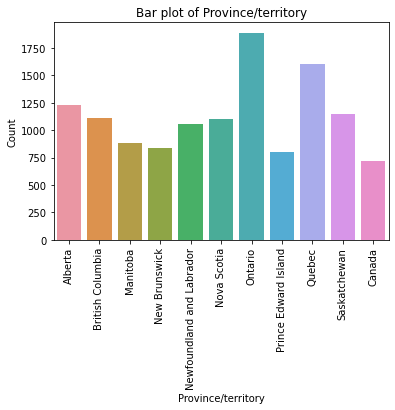

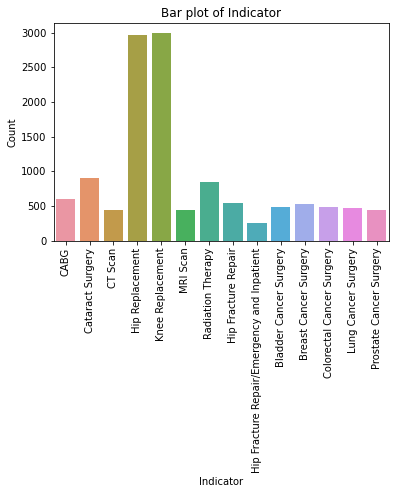

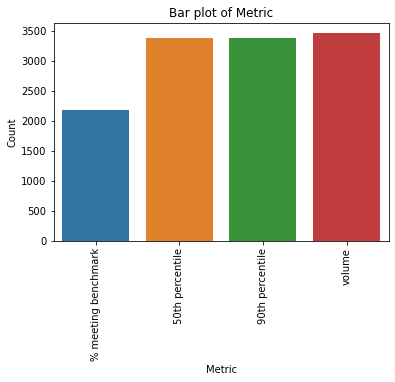

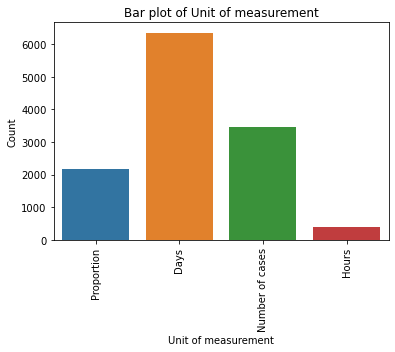

In [19]:
for column in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column)
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12378 entries, 6 to 15763
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Reporting level      12378 non-null  object        
 1   Province/territory   12378 non-null  object        
 2   Indicator            12378 non-null  object        
 3   Metric               12378 non-null  object        
 4   Data year            12378 non-null  datetime64[ns]
 5   Unit of measurement  12378 non-null  object        
 6   Indicator result     12378 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 773.6+ KB


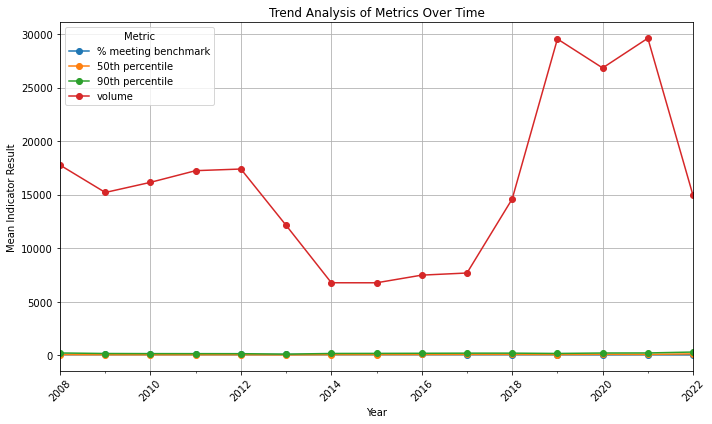

In [21]:
# Group data by 'Metric' and 'Data year', and calculate mean indicator result for each group
trend_data = data.groupby(['Metric', pd.Grouper(key='Data year', freq='Y')])['Indicator result'].mean().reset_index()

# Pivot the data for better visualization
pivot_data = trend_data.pivot(index='Data year', columns='Metric', values='Indicator result')

# Plotting the trends
pivot_data.plot(marker='o', figsize=(10, 6))
plt.title('Trend Analysis of Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Indicator Result')
plt.grid(True)
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

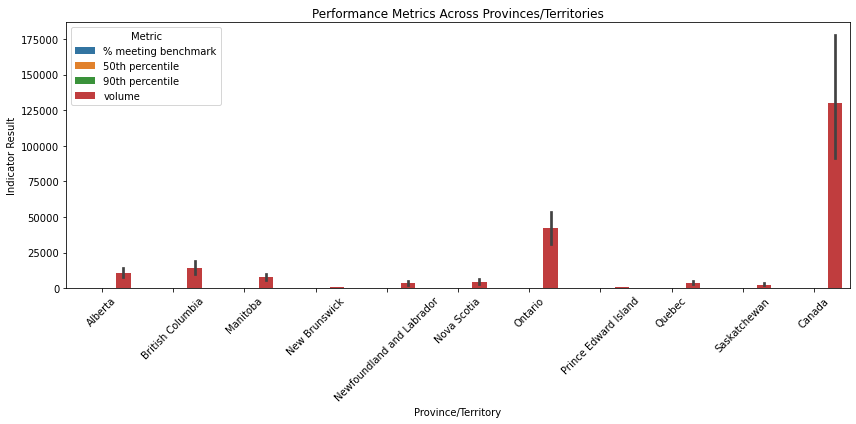

In [22]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Province/territory', y='Indicator result', hue='Metric', data=data)
plt.title('Performance Metrics Across Provinces/Territories')
plt.xlabel('Province/Territory')
plt.ylabel('Indicator Result')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Metric')
plt.show()

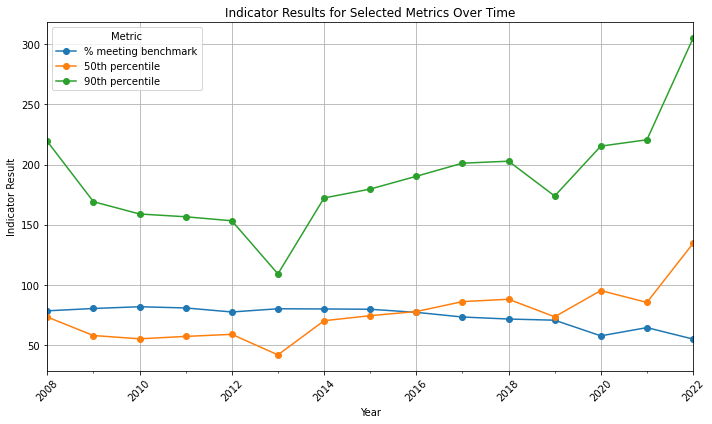

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the specified metrics
metrics_to_include = ['50th percentile', '90th percentile', '% meeting benchmark']
filtered_data = data[data['Metric'].isin(metrics_to_include)]

# Aggregate the data to remove duplicate entries
agg_data = filtered_data.groupby(['Data year', 'Metric'])['Indicator result'].mean().reset_index()

# Pivot the aggregated data for visualization
pivot_data = agg_data.pivot(index='Data year', columns='Metric', values='Indicator result')

# Plot the indicator results for the selected metrics
pivot_data.plot(marker='o', figsize=(10, 6))
plt.title('Indicator Results for Selected Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Indicator Result')
plt.grid(True)
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
data.isnull().sum()

Reporting level        0
Province/territory     0
Indicator              0
Metric                 0
Data year              0
Unit of measurement    0
Indicator result       0
dtype: int64

In [25]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# Function to convert hours to days
def hours_to_days(hours):
    return hours / 24

# Convert hours to days where the unit of measurement is 'Days'
data.loc[data['Unit of measurement'] == 'Days', 'Indicator result'] = data.loc[data['Unit of measurement'] == 'Days', 'Indicator result'].apply(hours_to_days)

# Print the modified DataFrame
print(data)


      Reporting level Province/territory                Indicator  \
6          Provincial            Alberta                     CABG   
7          Provincial            Alberta                     CABG   
8          Provincial            Alberta                     CABG   
10         Provincial            Alberta         Cataract Surgery   
11         Provincial            Alberta         Cataract Surgery   
...               ...                ...                      ...   
15759      Provincial       Saskatchewan  Prostate Cancer Surgery   
15760      Provincial       Saskatchewan        Radiation Therapy   
15761      Provincial       Saskatchewan        Radiation Therapy   
15762      Provincial       Saskatchewan        Radiation Therapy   
15763      Provincial       Saskatchewan        Radiation Therapy   

                    Metric  Data year Unit of measurement  Indicator result  
6      % meeting benchmark 2008-01-01          Proportion         99.000000  
7          50th

In [26]:
# Change the unit of measurement from 'Hours' to 'Days'
data.loc[data['Unit of measurement'] == 'Hours', 'Unit of measurement'] = 'Days'

In [27]:
data.isnull().sum()

Reporting level        0
Province/territory     0
Indicator              0
Metric                 0
Data year              0
Unit of measurement    0
Indicator result       0
dtype: int64

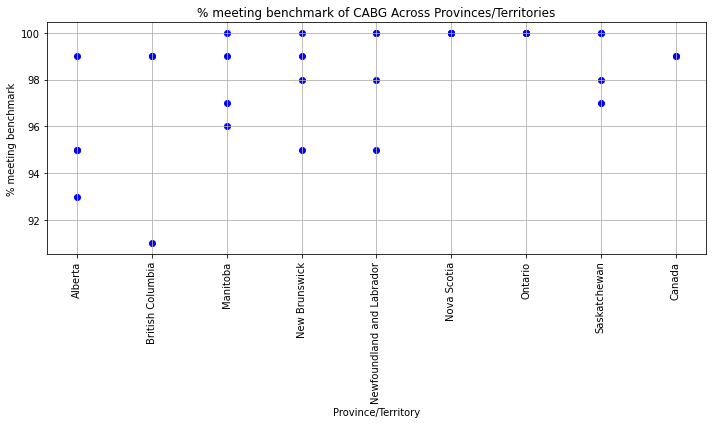

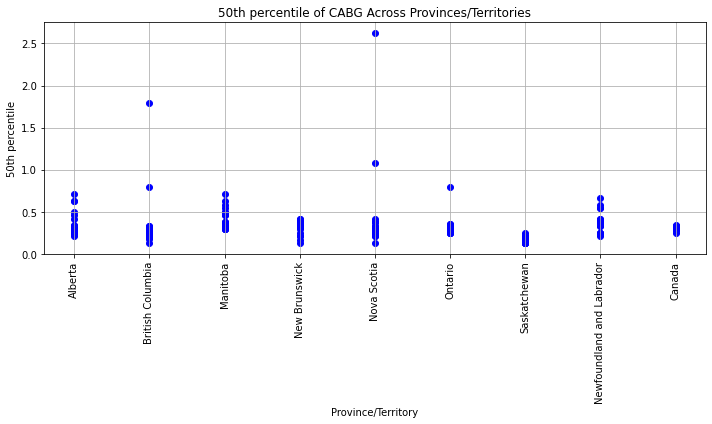

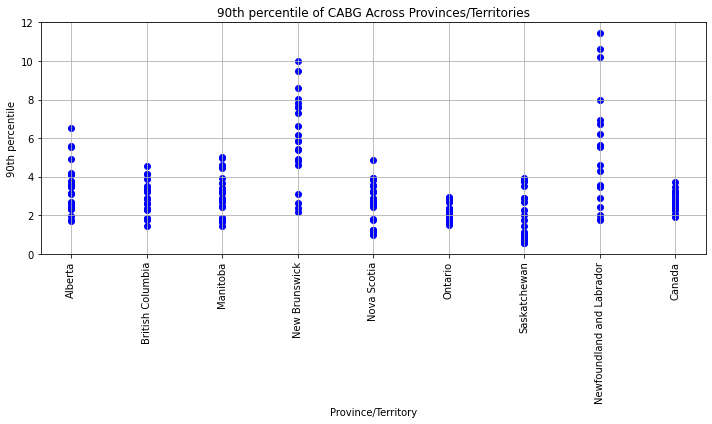

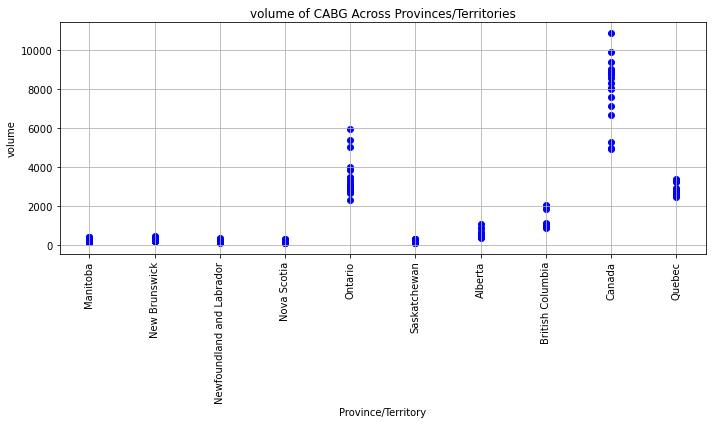

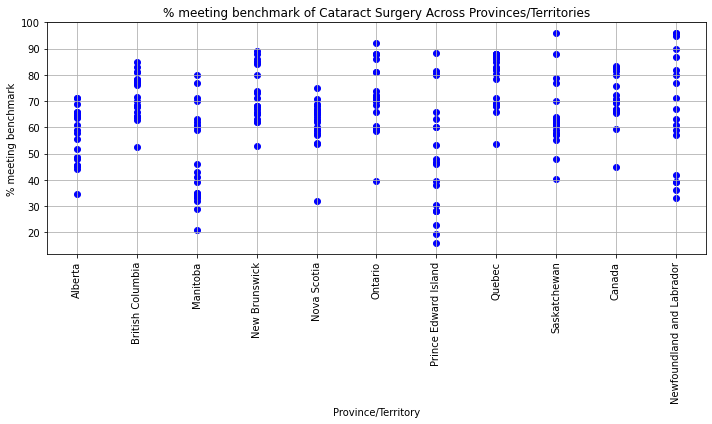

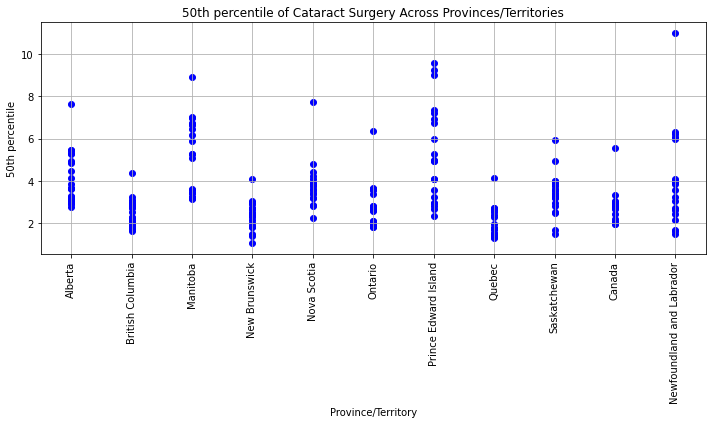

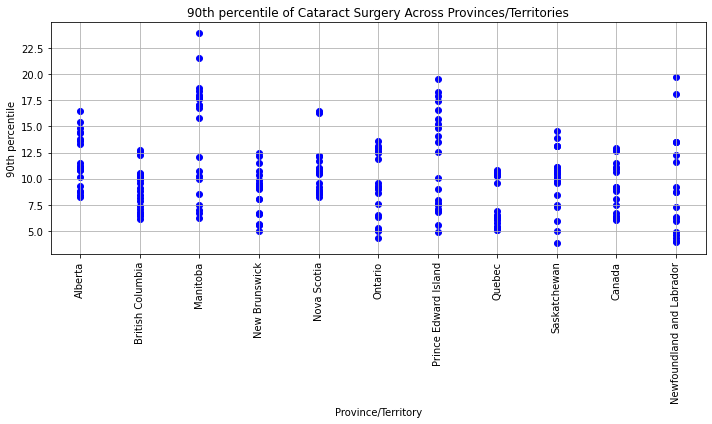

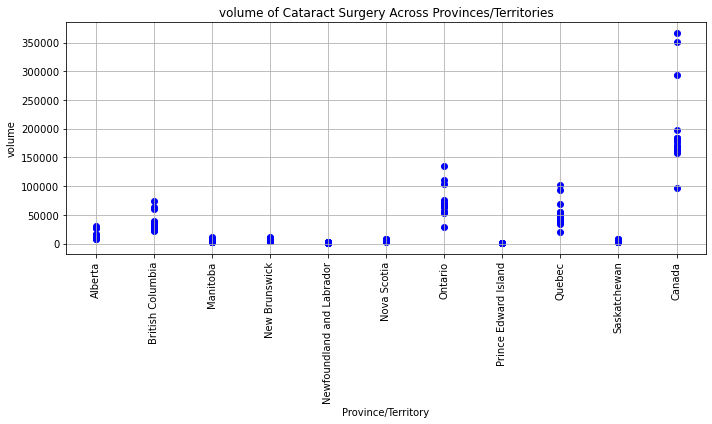

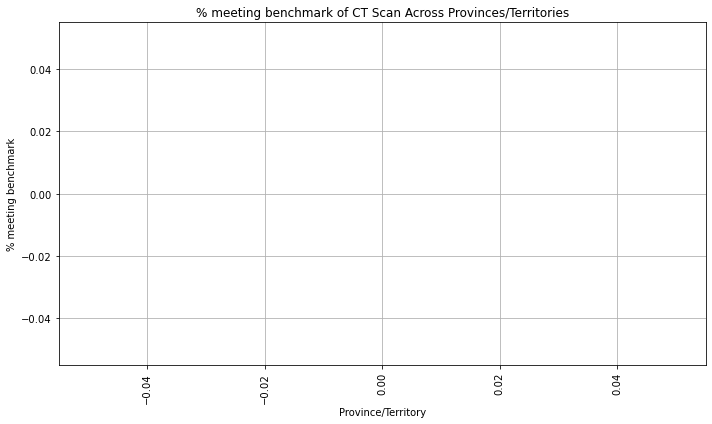

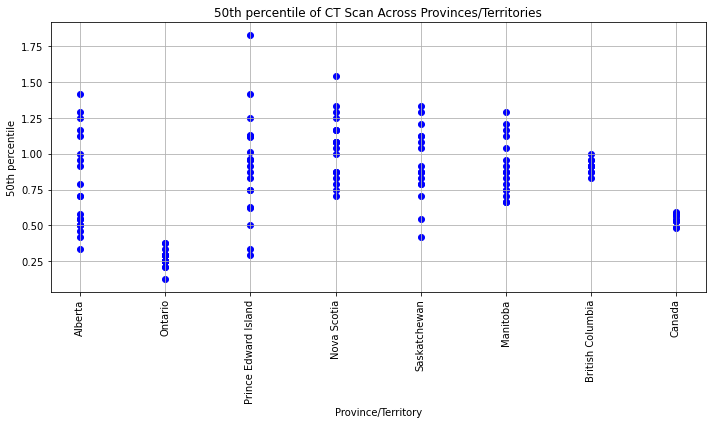

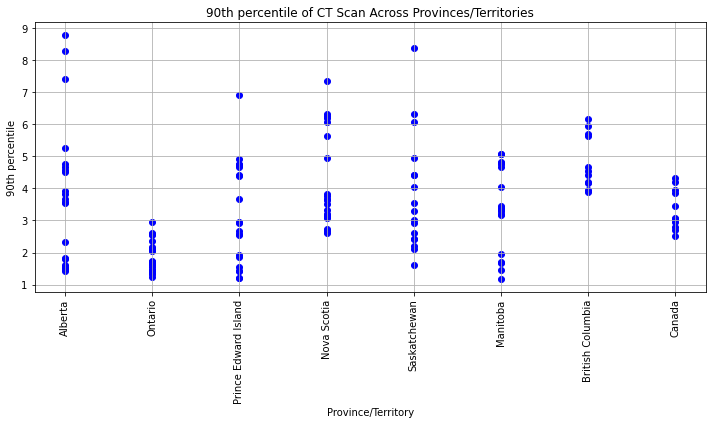

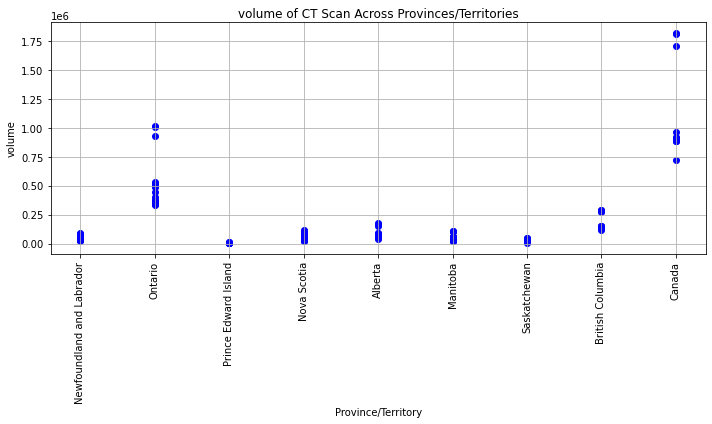

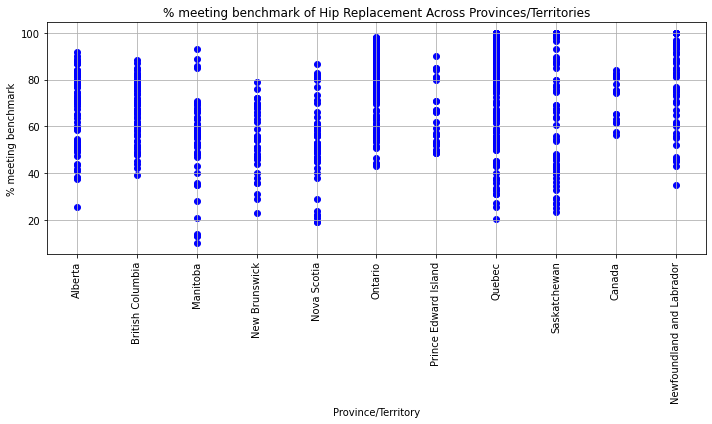

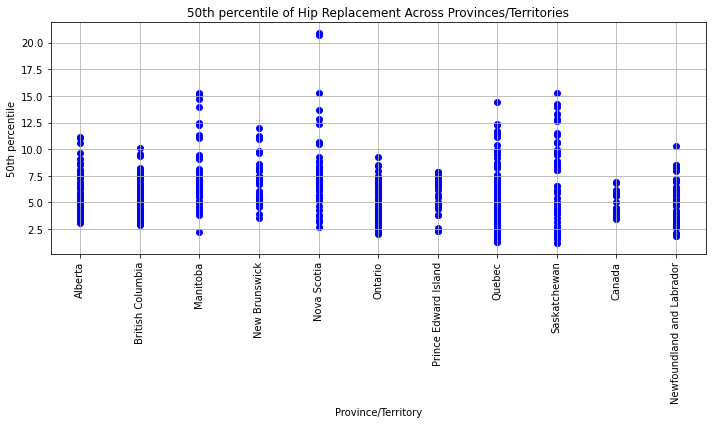

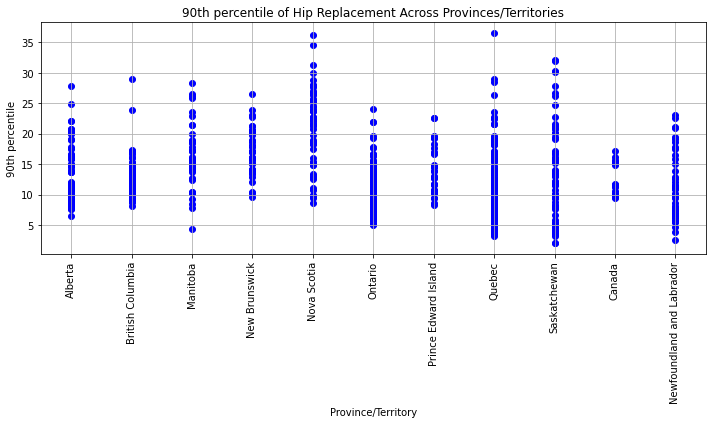

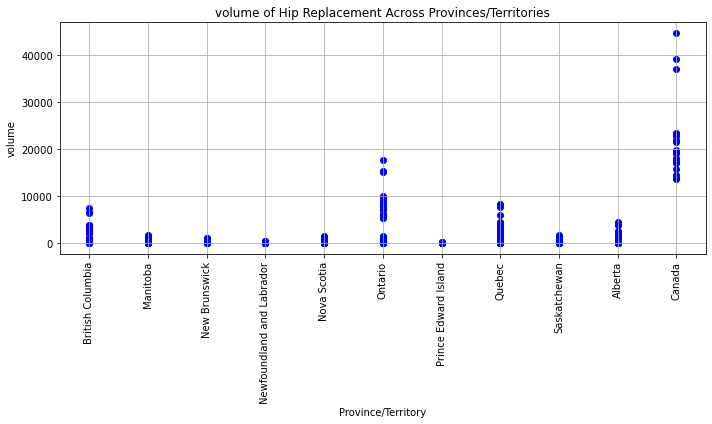

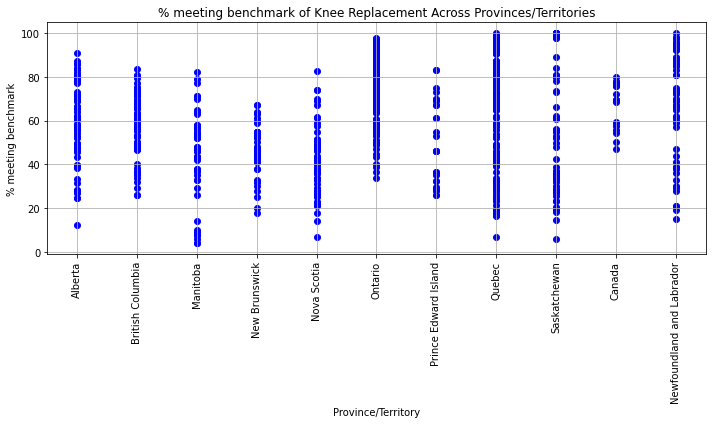

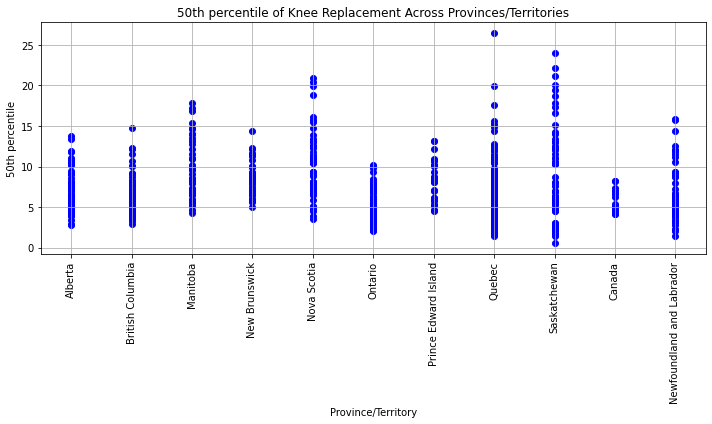

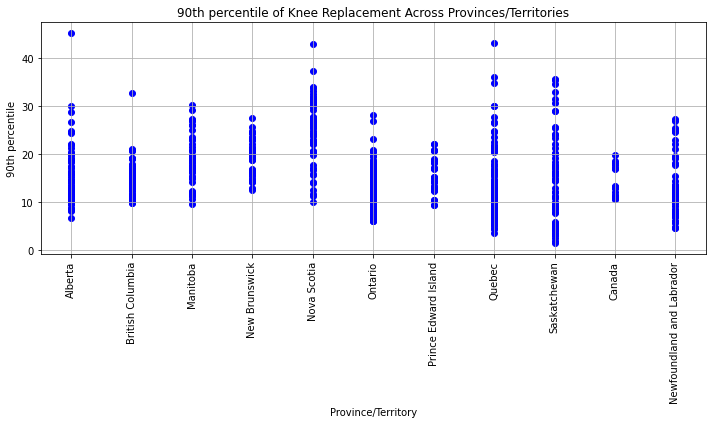

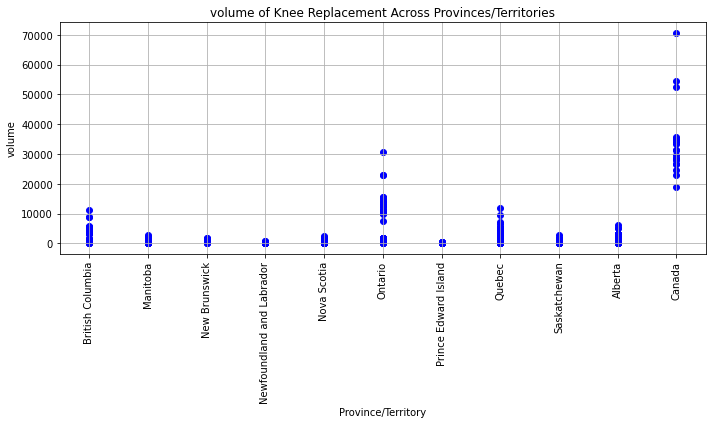

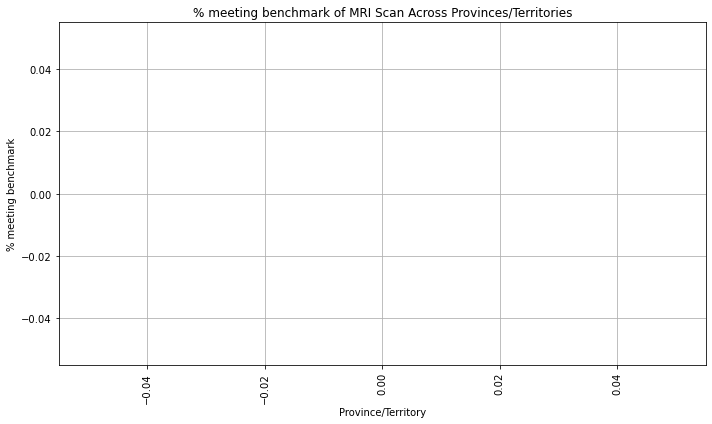

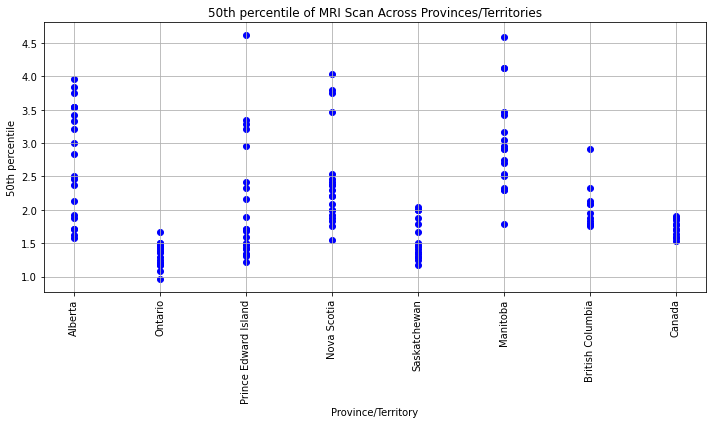

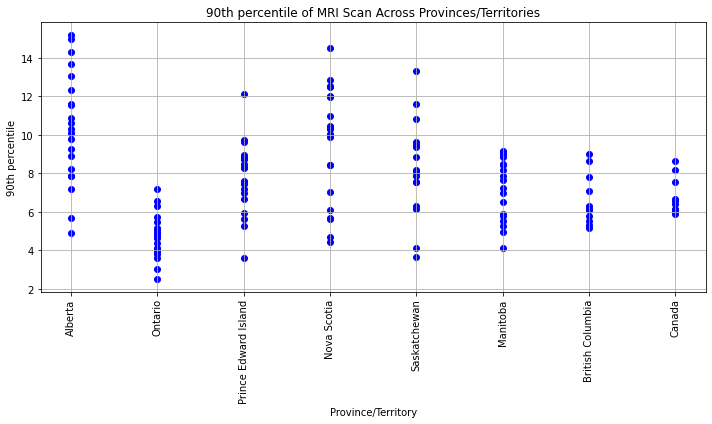

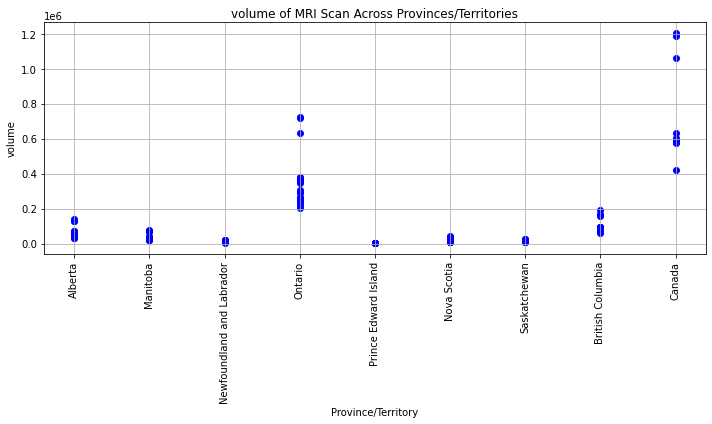

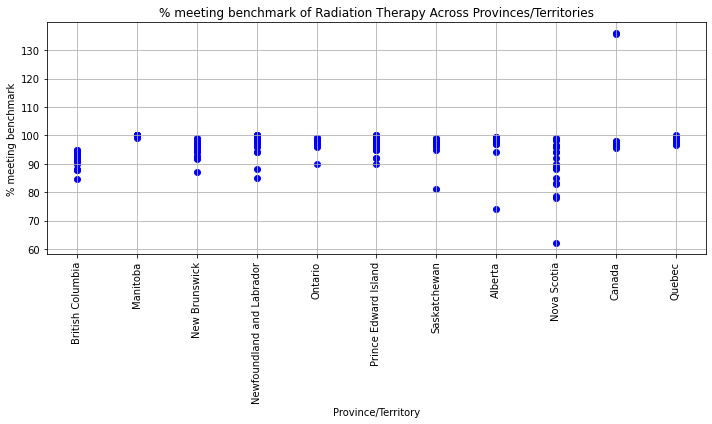

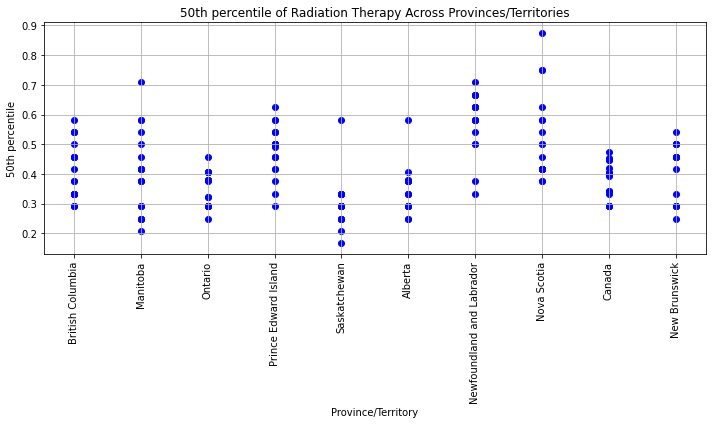

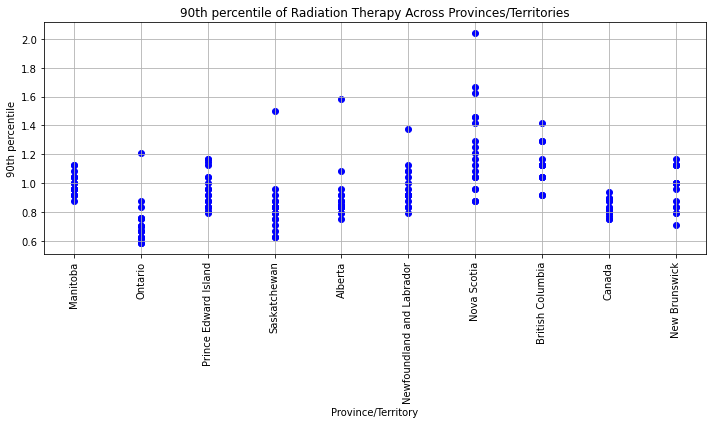

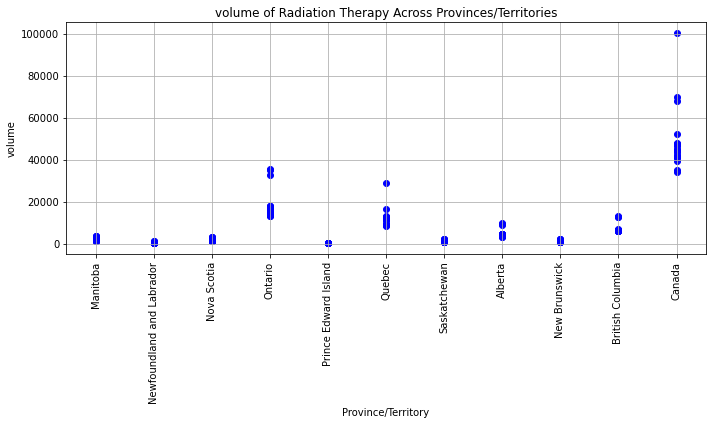

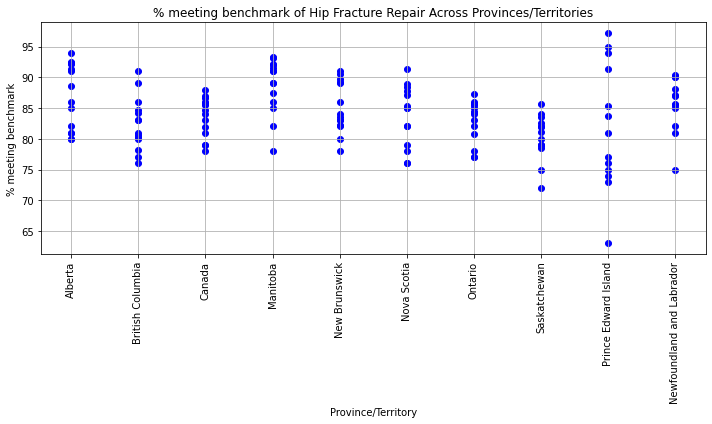

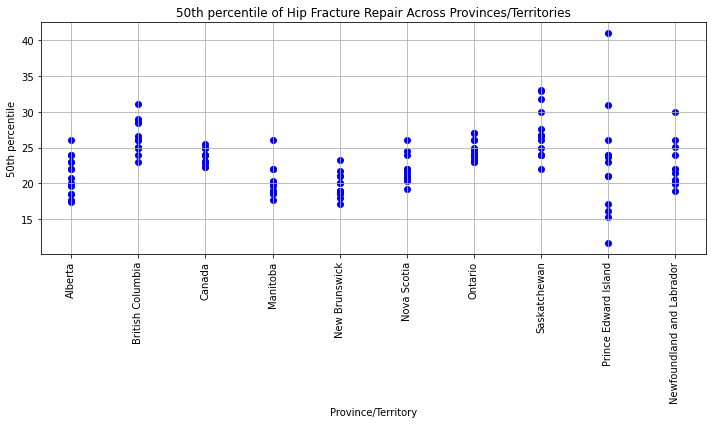

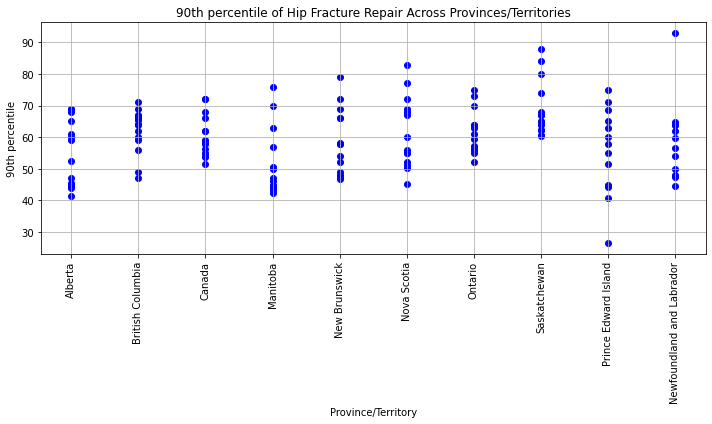

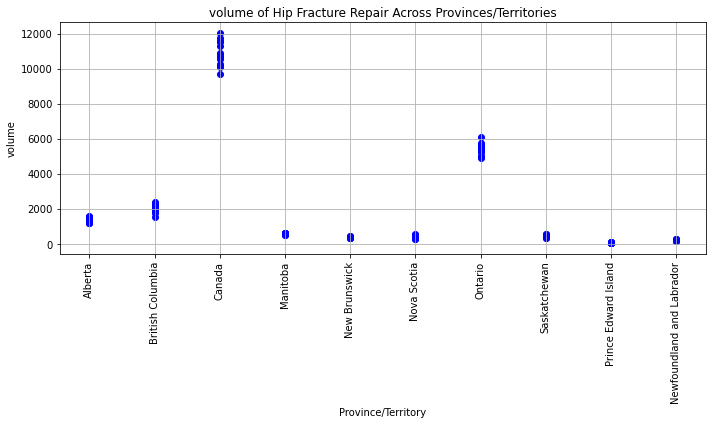

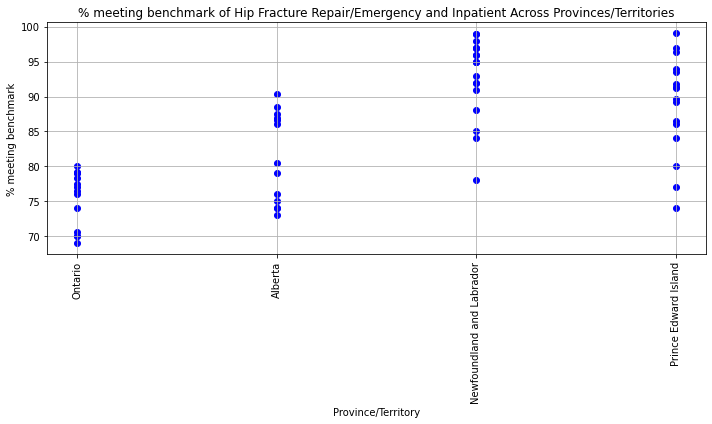

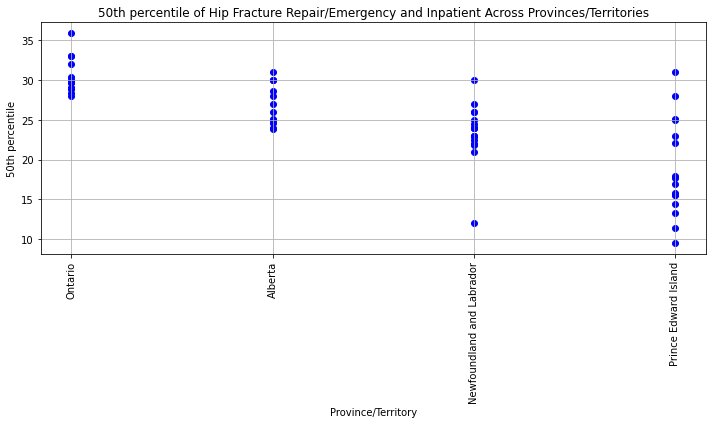

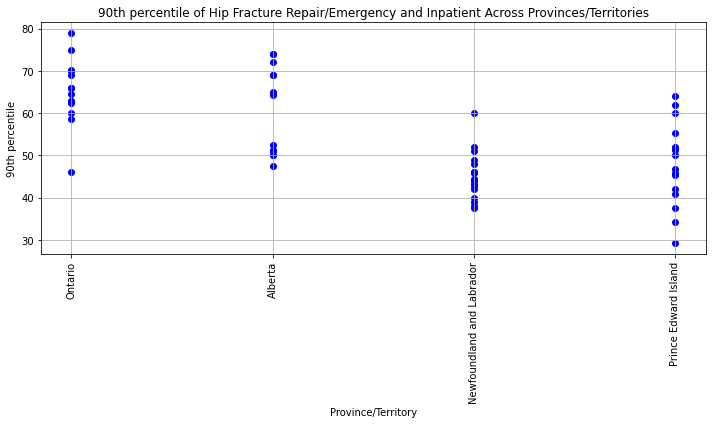

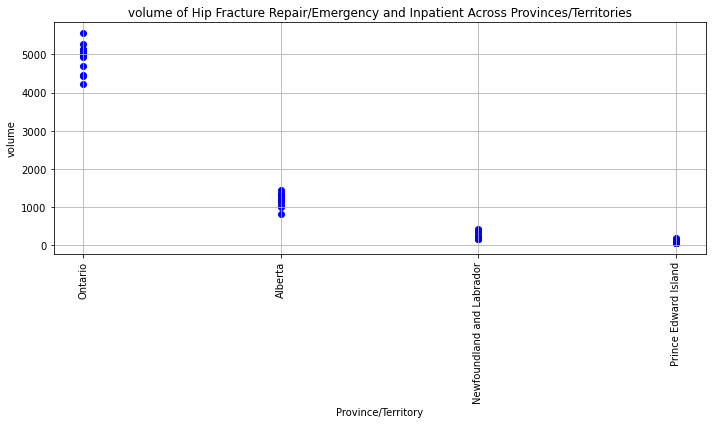

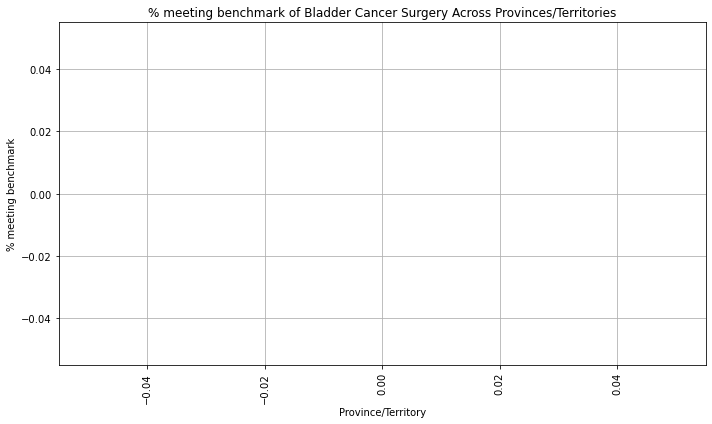

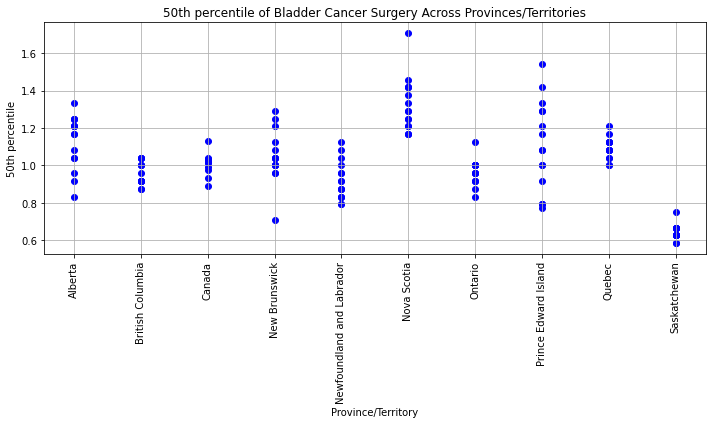

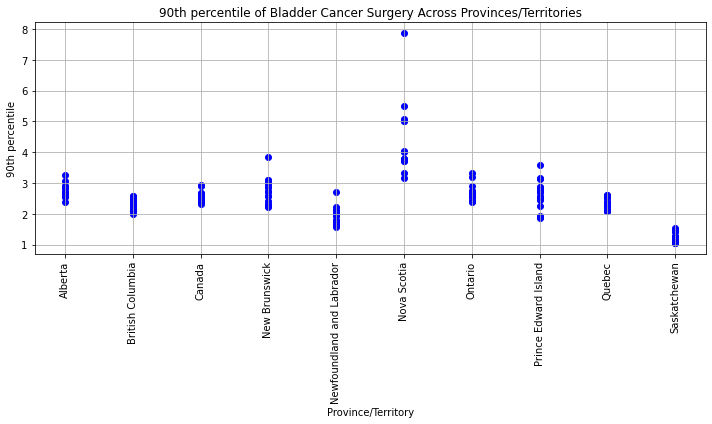

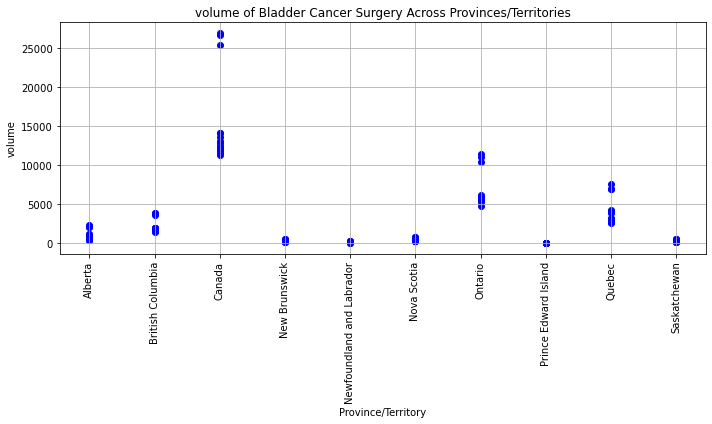

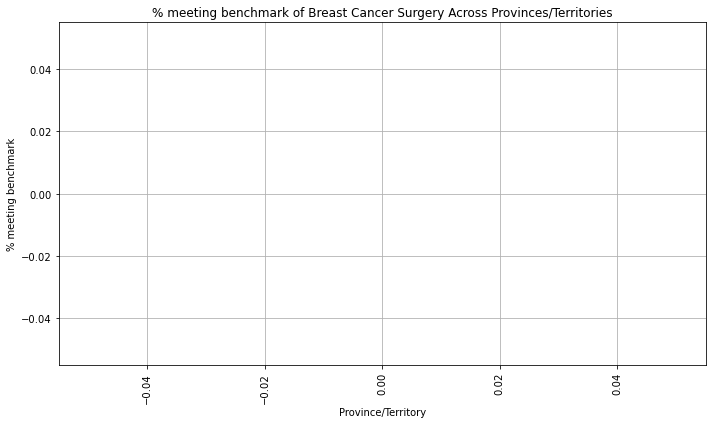

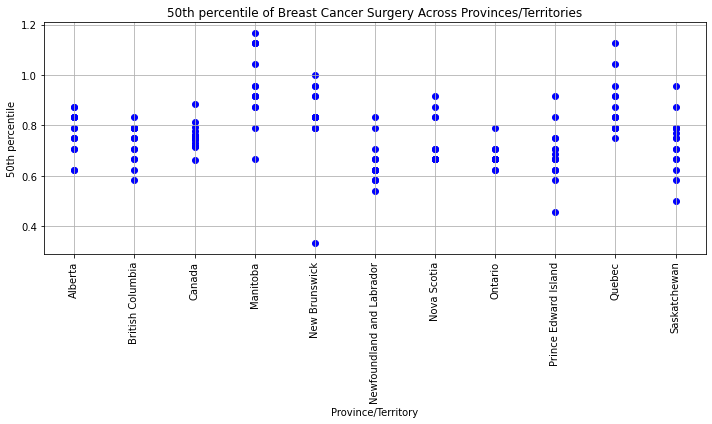

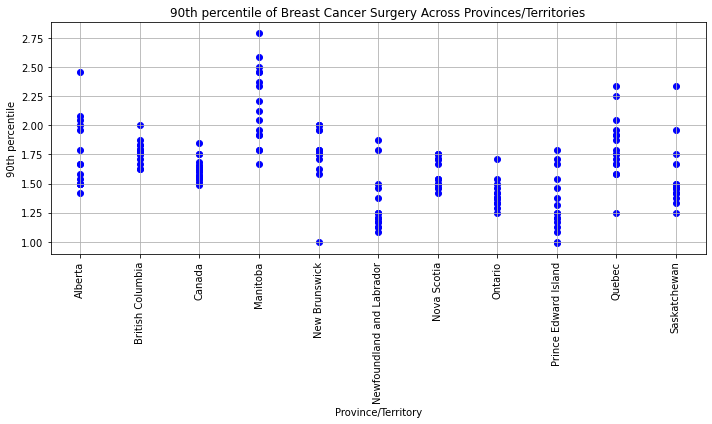

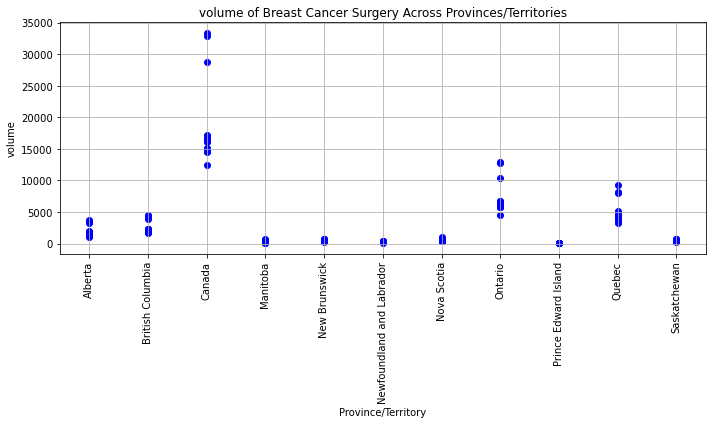

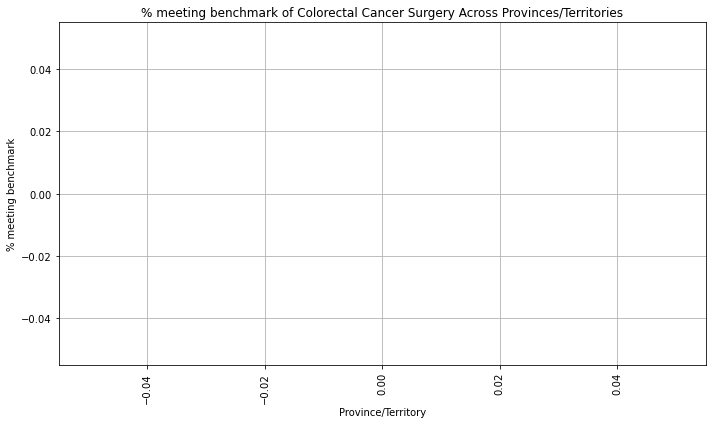

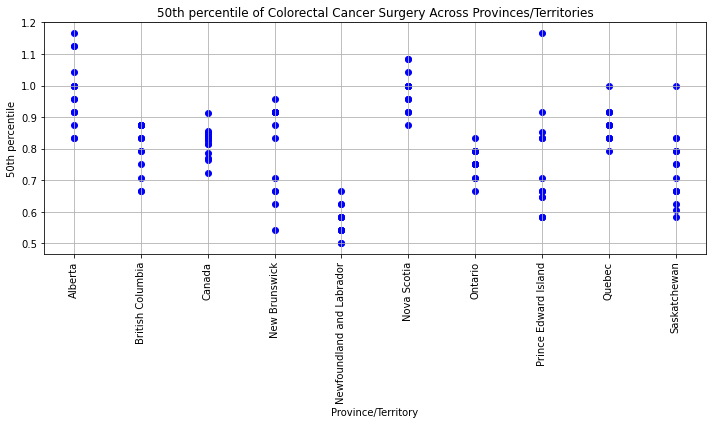

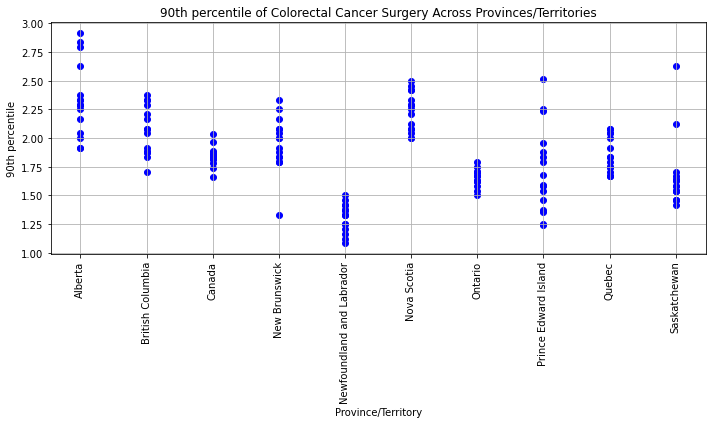

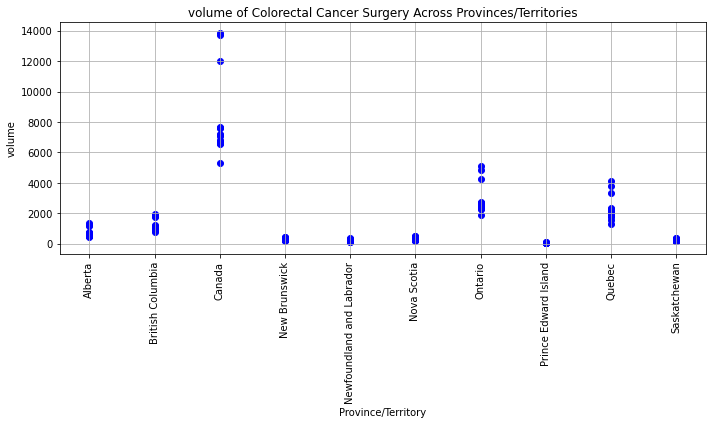

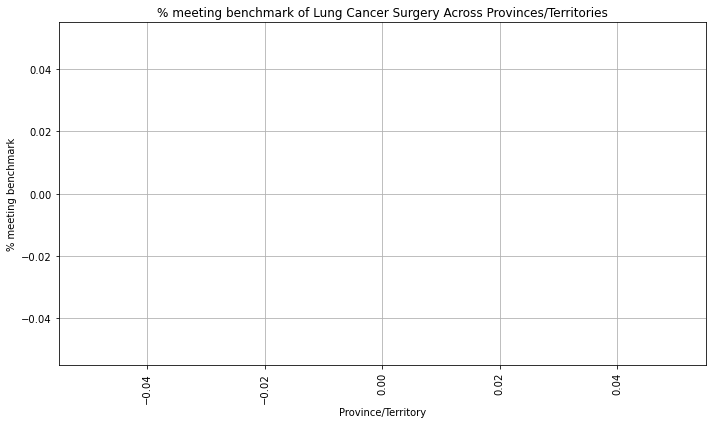

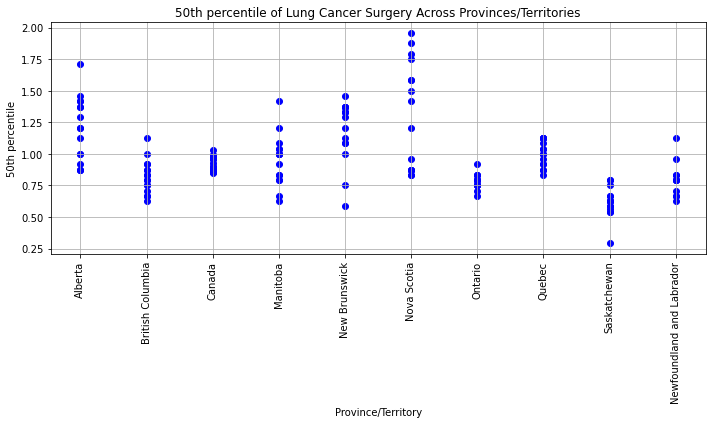

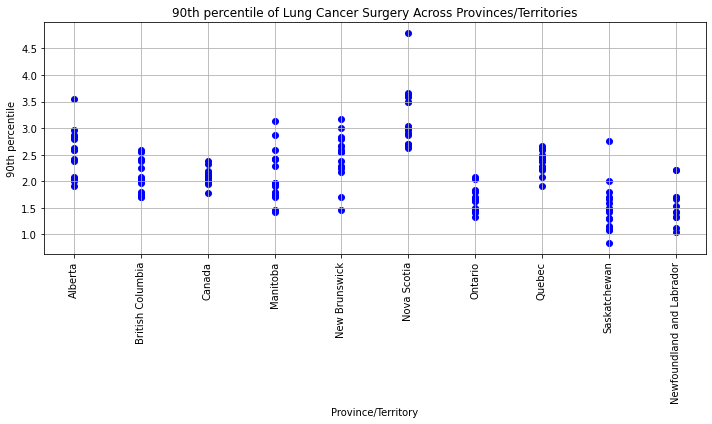

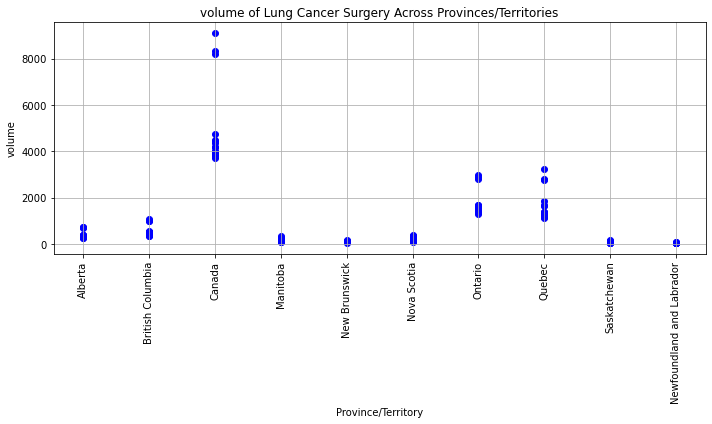

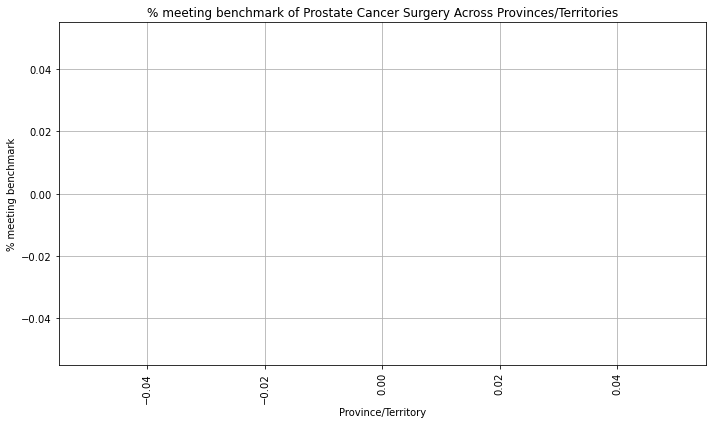

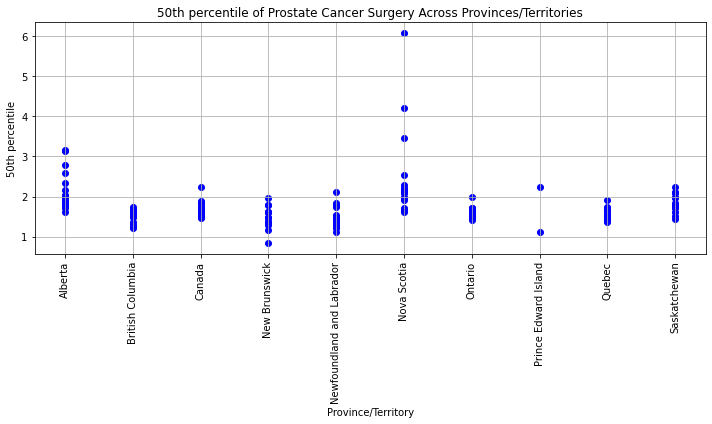

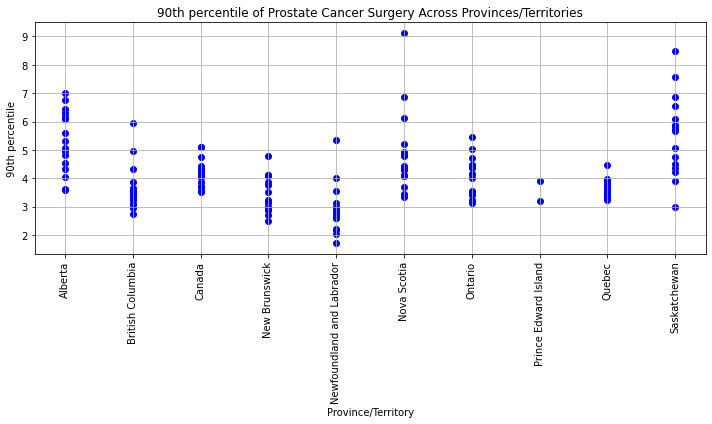

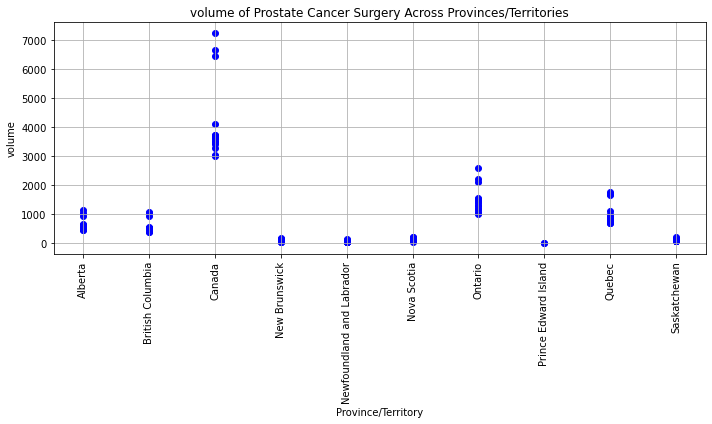

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of indicators and metrics
indicators = data['Indicator'].unique()
metrics = data['Metric'].unique()

# Loop through each indicator and metric combination
for indicator in indicators:
    for metric in metrics:
        # Filter the data for the current indicator and metric
        indicator_data = data[(data['Indicator'] == indicator) & (data['Metric'] == metric)]

        # Plot the scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(indicator_data['Province/territory'], indicator_data['Indicator result'], color='blue')
        plt.title(f'{metric} of {indicator} Across Provinces/Territories')
        plt.xlabel('Province/Territory')
        plt.ylabel(metric)
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


## Modelling

### Converting categorical columns to numerical

In [29]:
# Convert 'Reporting level' column to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Reporting level'], drop_first=True)

# Convert 'Province/territory' column to numerical using label encoding
province_map = {'Alberta': 0, 'British Columbia': 1, 'Manitoba': 2, 'New Brunswick': 3,
                'Newfoundland and Labrador': 4, 'Nova Scotia': 5, 'Ontario': 6,
                'Prince Edward Island': 7, 'Quebec': 8, 'Saskatchewan': 9, 'Canada': 10}
data['Province/territory'] = data['Province/territory'].map(province_map)

# Convert 'Indicator' column to numerical using label encoding
indicator_map = {'CABG': 0, 'Cataract Surgery': 1, 'CT Scan': 2, 'Hip Replacement': 3, 'Knee Replacement': 4,
                 'MRI Scan': 5, 'Radiation Therapy': 6, 'Hip Fracture Repair': 7,
                 'Hip Fracture Repair/Emergency and Inpatient': 8, 'Bladder Cancer Surgery': 9,
                 'Breast Cancer Surgery': 10, 'Colorectal Cancer Surgery': 11, 'Lung Cancer Surgery': 12,
                 'Prostate Cancer Surgery': 13}
data['Indicator'] = data['Indicator'].map(indicator_map)

# Convert 'Metric' column to numerical using label encoding
metric_map = {'% meeting benchmark': 0, '50th percentile': 1, '90th percentile': 2, 'volume': 3}
data['Metric'] = data['Metric'].map(metric_map)

# Convert 'Data year' column to numerical by extracting year
data['Data year'] = pd.to_datetime(data['Data year']).dt.year

# Convert 'Unit of measurement' column to numerical using label encoding
unit_map = {'Proportion': 0, 'Days': 1, 'Number of cases': 2}
data['Unit of measurement'] = data['Unit of measurement'].map(unit_map)


In [30]:
data.isnull().sum()

Province/territory            0
Indicator                     0
Metric                        0
Data year                     0
Unit of measurement           0
Indicator result              0
Reporting level_Provincial    0
Reporting level_Regional      0
dtype: int64

In [31]:
# Define a dictionary to map models to their names
model_names = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Separate data based on the metric
metrics = data['Metric'].unique()

# Initialize dictionaries to store models and their performance
performance = {}

# Train a separate model for each metric
for metric in metrics:
    # Filter data for the current metric
    subset_data = data[data['Metric'] == metric]
    
    # Split data into features (X) and target (y)
    X = subset_data.drop(columns=['Metric', 'Indicator result'])
    y = subset_data['Indicator result']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize a dictionary to store performance metrics for each model
    model_performance = {}
    
    # Train and evaluate each model
    for name, model in model_names.items():
        # Initialize the model
        regressor = model
        
        # Train the model on the training data
        regressor.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = regressor.predict(X_test)
        
        # Evaluate the performance of the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        accuracy = (r2 * 100)  # Calculate percentage accuracy
        
        # Store the performance metrics for the model
        model_performance[name] = {'MSE': mse, 'R2': r2, 'Accuracy': accuracy}
    
    # Store the performance metrics for the metric
    performance[metric] = model_performance

# Print the performance of each model for each metric
for metric, model_perf in performance.items():
    print(f"Metric: {metric}")
    for name, scores in model_perf.items():
        print(f"Model: {name}")
        print(f"MSE: {scores['MSE']}")
        print(f"R-squared (R2 score): {scores['R2']}")
        print(f"Percentage Accuracy: {scores['Accuracy']:.2f}%")
        print()
    print()


Metric: 0
Model: Linear Regression
MSE: 353.72159960180267
R-squared (R2 score): 0.22061389294397815
Percentage Accuracy: 22.06%

Model: Decision Tree
MSE: 182.17505250738174
R-squared (R2 score): 0.5985975831380046
Percentage Accuracy: 59.86%

Model: Random Forest
MSE: 168.30153075771491
R-squared (R2 score): 0.6291663415056086
Percentage Accuracy: 62.92%

Model: Support Vector Machine
MSE: 469.67106950176606
R-squared (R2 score): -0.034867836365948035
Percentage Accuracy: -3.49%


Metric: 1
Model: Linear Regression
MSE: 35.695361063573785
R-squared (R2 score): 0.010143309369438747
Percentage Accuracy: 1.01%

Model: Decision Tree
MSE: 3.4768286800578356
R-squared (R2 score): 0.9035851710534034
Percentage Accuracy: 90.36%

Model: Random Forest
MSE: 2.7859401128791506
R-squared (R2 score): 0.9227439818995519
Percentage Accuracy: 92.27%

Model: Support Vector Machine
MSE: 39.61161380364252
R-squared (R2 score): -0.09845704825275137
Percentage Accuracy: -9.85%


Metric: 2
Model: Linear Re

| Metric             | Random Forest | Decision Tree | Linear Regression | Support Vector Machine |
|--------------------|---------------|---------------|-------------------|------------------------|
| % meeting benchmark | 76.74%       | 59.85%        | 22.06%            | -3.49%                 |
| 50th percentile    | 92.15%        | 90.36%        | 1.01%             | -9.85%                 |
| 90th percentile    | 92.44%        | 91.09%        | -0.05%            | -7.01%                 |
| volume             | 79.54%        | 75.13%        | 7.03%             | -3.71%                 |


In [32]:
data.isnull().sum()

Province/territory            0
Indicator                     0
Metric                        0
Data year                     0
Unit of measurement           0
Indicator result              0
Reporting level_Provincial    0
Reporting level_Regional      0
dtype: int64